# 1. Problema de Ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Misma secuencia de n numeros pero ordenada $[a_1',a_2',...,a_n']$

Este algoritmo usa el paradigma divide y venceras para poder ordenar un arreglo desordenado y retorar este mismo ya ordenado

#2. Quick Sort

El siguiente codio muestra una impletacion del codido *Quicksort*

##2.1 Codigo

In [34]:
import random
from termcolor import colored
import copy

##pivote final
def particion(arr, low, high, cont, verbose = False):
  pivote = arr[high]
  left = low

  for i in range(low, high):
    cont[0] += 1
    if(arr[i] <= pivote): 
      arr[left], arr[i] = arr[i], arr[left]
      left += 1
      cont[0] += 1
  cont[0] += 1
  arr[left], arr[high] = arr[high], arr[left]
  return left


def quickSort(arr, low, high, cont,verbose = False):
  if(low < high):
    pivote = particion(arr, low, high, cont)
    quickSort(arr, low, pivote-1, cont)
    quickSort(arr, pivote+1, high, cont)


##pivote inicial

def partitionIni(arr, low, high, cont ):
  pivote = arr[low]
  left = low + 1
  right = high
  while left < right:
    while left <= right and arr[right] >= pivote:
        right = right - 1
    while left <= right and arr[left] <= pivote:
        left = left + 1
    cont[0] += 1
    if left <= right:
        arr[left], arr[right] = arr[right], arr[left]
    else:
        break
  arr[low], arr[right] = arr[right], arr[low]
  return right


def quicksortInit(arr,low, high, cont):
    if low < high:
      pivote = partitionIni(arr, low, high, cont)
      quicksortInit(arr, low, pivote-1, cont)
      quicksortInit(arr, pivote+1, high, cont)



a = [2,8,7,1,3,5,6,4]
cont = [0]

print("Arreglo de entrada :", a)

quickSort(a, 0, len(a)-1, cont)

print("Arreglo de Salida :", a)


Arreglo de entrada : [2, 8, 7, 1, 3, 5, 6, 4]
Arreglo de Salida : [1, 2, 3, 4, 5, 6, 7, 8]


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) $a$ con la secuencia de $n$ elementos que queremos ordenar. Este algoritmo usa el paradigna divide y venceras para separar el arreglo y ir ordenando, este orden se logra gracias a la funcion *partition* la cual a traves de un pivote lo ordena.

1. Se divide el arreglo en 2 sub-arreglos: A[i..j-1] y A[j+1..n] los elementos del primer sub arreglo son menores o iguales a p(pivote) y el otro sub arreglo son mayores o iguales.

2. Su usa la funcion Quicksort para ordenar los sub arreglos.

3. Se encuentran ordenados los sub arreglos

Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

## 2.3. Ejemplo

Consideremos, por ejemplo, el arreglo:

$a=[5,2,4,6,1,3]$

En la primera comparacion el pivot 3 es menor que 5 por lo que no se realizan cambios:

$a=[*5*,2,4,6,1,3]$

Para la siguiente iteracion como el pivote es mayor que 2, se intercambian las posiciones:

$a=[2,*5*,4,6,1,3]$

Como el pivote es menor que el siguiente numero, no se realizan cambios:

$a=[2,*5,4*,6,1,3]$

Como el siguente numero sigue siendo menor, tambien se mantiene

$a=[2,*5,4,6*,1,3]$

Y finalmente se compora el pivote con el penultimo numero:

$a=[2,1,*5,4,6*,3]$

Y el pivote toma la posicion central:
$a=[2,1,3,*5,4,6*]$

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [4]:
import random
a = random.sample(range(1, 100), 6)
print("Arreglo de entrada :", a)
cont = [0]
quickSort(a, 0, len(a)-1, cont)
print("Arreglo de Salida :", a)

Arreglo de entrada : [68, 3, 11, 22, 45, 23]
Arreglo de Salida : [3, 11, 22, 23, 45, 68]


# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El algoritmo **Quicksort** tiene un **tiempo de ejecución** de $O(n^2)$ para el peor caso y para un caso promedio $O(Nlog(n)).*

## Prueba del teorema

Observando el código, podemos apreciar que el **peor caso** ocurre cuando los elementos del arreglo se encuentran en la posicion **opuesta**
El numero de comparaciones realizado para el elemento **n** es igual a **n-1** 

# 4. Correctitud

### **Teorema 1**

> El algoritmo Partition retorna un recibe un arreglo A[p..r], lo reorganiza y retorna un índice q de tal forma que los elementos del arreglo A[p..q-1] son menores o iguales a A[q] y los elementos del arreglo A[q+1..r] son mayores a A[q].

## Prueba del Teorema

Para probar comprar esto se tiene que cumplir que antes de cada iteracion se cumple que para un indice k:

Si p≤k≤i, entonces A[k]≤A[r]

Si i<k<j, entonces A[k]>A[r]

Para comprobar este teorema se usara la *propiedad invariante de bucle*

**Inicialización**

Al comienzo de la primera iteración como no existen elementos entre p e i y tampco entre i+1 y j-1, asi que por lo tanto se mantiene la propiedad invariante de bucle para el inicio.

**Mantención**

Luego para cada iteracion siguiente pueden ocurrir 2 casos, el primero que A[j]≤ A[r] entonces se lleva a cabo el intercambio, por lo tanto se sigue cumpliendo la propiedad
Para el siguente caso cuando A[j] > A[r] como no se realiza ningun cambio, tambien se sigue manteniendo la propiedad

### **Teorema 2**

Para probar la correctitud del algoritmos *quicksort* vamos a utilizar el metodo de induccion, esto para comprobar que para n elementos, la funcion recibe el arreglo y lo retorna de manera ordenada.

**Caso base**

Para n = 1, como existe solo un elementos el arreglo se encuntra trivialmente ordenado, por lo tanto se cumple para el caso base.

**Paso inductivo**

Para n elementos el algoritmos dividara el arreglo en 2, este proceso se realizara de manera recursiva hasta llegar a que el tamaños del arreglo sea n = 1, como este es el caso base el cual se cumple, el paso inductiva tambien.


# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Número de comparaciones realizadas experimentalmente con el mejor y peor caso teóricos.
* Algoritmo QuickSort v/scon MergeSort.
* Comparaciones con diferentes pivotes

para tamaños de problemas con $n \in [5,19]$.

A continuacion se muestra un gráfico en el cual se realizaron las siguientes comparaciones.


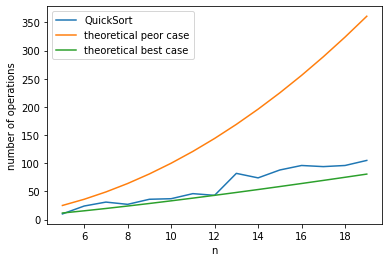

In [35]:
import matplotlib.pyplot as plt 
from math import log2
import random


x=[n for n in range(5,20)] 
y1=[n**2 for n in range(5,20)] #worst case
y2=[n*log2(n) for n in range(5,20)] #best case
y=[]; 

for n in range(5,20):
  cont = [0]
  arr = random.sample(range(1, 100), n)
  quickSort(arr,0, len(arr)-1,cont)
  y.append(cont[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)


plt.legend(["QuickSort", "theoretical peor case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

### Análisis de resultados

Se puede apreciar que el caso **exprimental** se encuentre entre la grafica del mejor caso la cual tiene forma lineal y la grafica del peor caso de forma cuadratica



## 5.2. Tiempo de ejecución (experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **QuickSort** y **Merge sort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$, con el fin de comparar los tiempos de ejecucion y ver cual es mas eficiente en respecto del tiempo.



### Codigo de mergesort


In [37]:
def merge(low, right):
    
  i, j = 0, 0 
  result = []
  while(i < len(low) and j < len(right)):
    if (low[i] < right[j]):
      result.append(low[i])
      i += 1
    else:
      result.append(right[j])
      j += 1
  result += low[i:]
  result += right[j:]


  return result

def mergeSort(arr):
    
    if len(arr) > 1:
        mid = len(arr)//2
        left= (arr[:mid])
        right=(arr[mid:])
 
        mergeSort(left)
        mergeSort(right )
        arr[:]=merge(left,right)

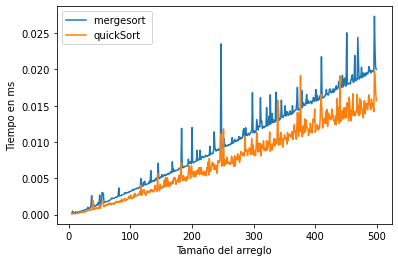

In [43]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
from termcolor import colored
import copy


x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  size = len(a)

  t1 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a},{0},{len(a)-1},{[0]})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["mergesort ", "quickSort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Resultados
Podemos notar que mergesort es mas lento que quicksort, esto se puede deber a que mergesort a diferencia de quicksort no tiene mejor caso, por lo que siempre se ejecutara completamente sin importar el arreglo recibido.Tambien se puede notar algunas irregularides, esas pueden ser causadas por el compilador.